## Machine Learning Full Course

### Lesson 1:
Task: Given the insurance dataset, your job is to create  a system to figure the annual insurance premium of each customer based on: age, sex, bmi, children, smoker, region, charges

#### Downloading the Data

In [3]:
import pandas as pd

In [4]:
# Turn the link of the csv file into a dataframe
url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
medical_df = pd.read_csv(url)

In [5]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Understanding data

In [6]:
medical_df.info()
# All the columns have correct data types and there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Exploratory Data Analysis & Visualization 

In [1]:
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns
import jovian 

<IPython.core.display.Javascript object>

### Age

In [9]:
medical_df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

The maximum age is 64 and the minimum age is 18. So, when creating a historgram, we should create 47 bins

In [10]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap = 0.1, width = 700)
fig.show()

### BMI

In [11]:
fig = px.histogram(medical_df,
                   x = 'bmi',
                   marginal = 'box',
                   color_discrete_sequence = ['red'],
                   title = "Distribution of BMI (Body Mass Index)")
fig.update_layout(bargap = 0.1, width = 700)
fig.show()

### Charges

In [12]:
fig = px.histogram(medical_df,
                   x = 'charges',
                   marginal = 'box',
                   color = 'smoker',
                   color_discrete_sequence=['green','grey'],
                   title = 'Annual Medical Charges')
fig.update_layout(bargap = 0.1, width = 700)
fig.show()

<b>We can make the following observations from the above graph:</b>

For most customers, the annual medical charges are under $10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"

There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is $7300, the median for smokers is close to $35,000

In [13]:
fig = px.histogram(medical_df, 
                   x = 'charges',
                   marginal = 'box',
                   color = 'sex',
                   color_discrete_sequence  = ['green','orange'],
                   title = 'Distribution of Annual Charges by Sex')
fig.update_layout(bargap = 0.1, width = 700)
fig.show()


### Smoker

In [14]:
fig = px.histogram(medical_df, 
                   x = 'smoker',
                   marginal = 'box',
                   color = 'sex',
                   color_discrete_sequence=['green','orange'],
                   title = 'Smoker by Sex')
fig.update_layout(bargap = 0.1, width = 700)
fig.show()

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

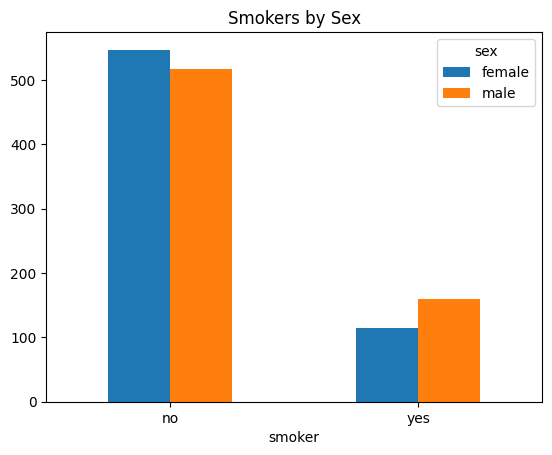

In [15]:
# A better graph
plot_smoker = medical_df.groupby('smoker')['sex'].value_counts().unstack()
plot_smoker.plot(kind = 'bar')
plt.title("Smokers by Sex")
plt.xticks(rotation = 0)

In [16]:
fig = px.histogram(medical_df, 
                   x = 'region',
                   marginal = 'box',
                   color = 'smoker',
                   color_discrete_sequence=['green','orange'],
                   title = 'Smoker by Region')
fig.update_layout(bargap = 0.1, width = 700)
fig.show()

#### Age vs. Charges

In [17]:
fig = px.scatter(medical_df, 
                 x = 'age',
                 y = 'charges',
                 color = 'smoker',
                 opacity = 0.8,
                 title = 'Age vs Charges')
fig.update_layout(width = 800, height = 500)
fig.show()

<b>We can make the following observations from the above chart:</b>

The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.

We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others

The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".

The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

#### BMI and Charges

In [18]:
fig = px.scatter(medical_df, 
                 x = 'bmi',
                 y = 'charges',
                 color = 'smoker',
                 opacity = 0.8,
                 title = 'BMI vs. Charges')
fig.update_layout(width = 800, height = 600)
fig.show()

<b> Observation </b>

An increase in BMI doesn't seem to cause the medical charges to increase. However, for smokers who have a higher than 30 bmi significantly pay more

C:\Users\JENNY LU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\JENNY LU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\JENNY LU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\JENNY LU\AppData\Local\Packages\PythonSoftwareFoundation.Python.

<Axes: title={'center': 'Region vs Charges'}, xlabel='region', ylabel='charges'>

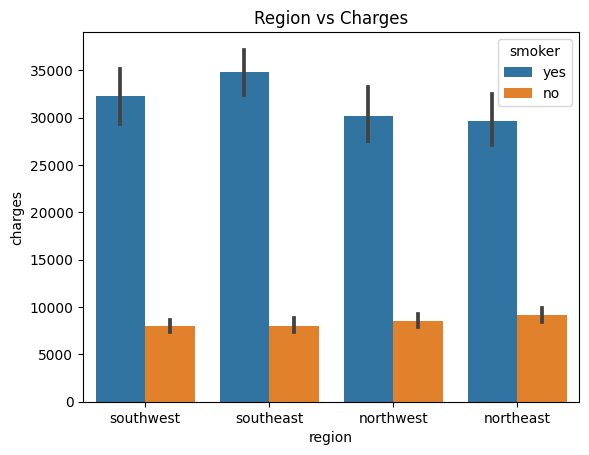

In [19]:
plt.title("Region vs Charges")
sns.barplot(medical_df, x = 'region', y = 'charges', hue = 'smoker')

In [20]:
fig = px.violin(medical_df, x = 'children', y = 'charges', title = 'Children vs. Charges')
fig.update_layout(width = 800)

There is a weak trend that the more children, the higher charges overall

C:\Users\JENNY LU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\JENNY LU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\JENNY LU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\JENNY LU\AppData\Local\Packages\PythonSoftwareFoundation.Python.

<Axes: title={'center': 'Children vs Charges'}, xlabel='children', ylabel='charges'>

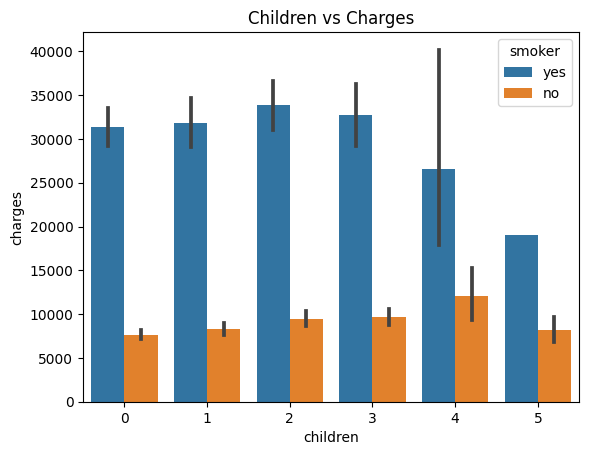

In [21]:
plt.title("Children vs Charges")
sns.barplot(medical_df, x = 'children', y = 'charges', hue = 'smoker')

There is a slight trend that the more children (3 or higher) they have, the less medical charges a smoker has to pay

C:\Users\JENNY LU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\JENNY LU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\JENNY LU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\JENNY LU\AppData\Local\Packages\PythonSoftwareFoundation.Python.

<Axes: title={'center': 'Sex vs Charges'}, xlabel='sex', ylabel='charges'>

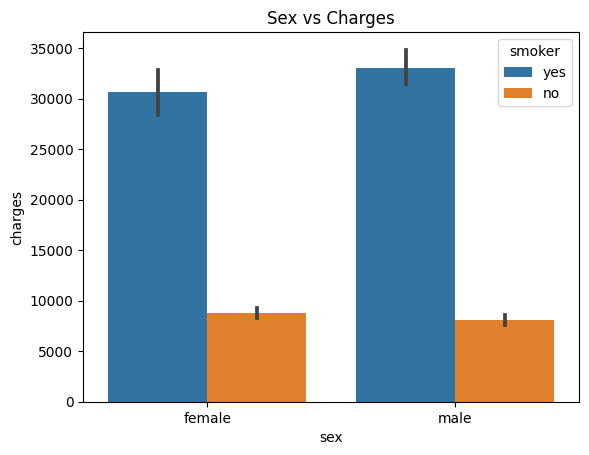

In [22]:
plt.title("Sex vs Charges")
sns.barplot(medical_df, x = 'sex', y = 'charges', hue = 'smoker')

Both female and male smokers pay significantly more than female and male non-smokers

#### Correlation between Charges and numerical values

In [23]:
medical_df.corr(numeric_only = True)
# Focus on the last row, the most important row

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


#### Correlation between Charges and Categorical Values

In [24]:
# Turn smoker into numerical value
smoker_values = {'no':0, 'yes':1}
smoker_numeric = medical_df['smoker'].map(smoker_values)
smoker_numeric.head()

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int64

In [25]:
medical_df['charges'].corr(smoker_numeric)

0.7872514304984778

<b> The correlation order goes like this </b>
1. Smoker (0.79)
2. Age (0.3)
3. BMI (0.2)
4. Children (0.07)

<Axes: title={'center': 'Correlation Matrix'}>

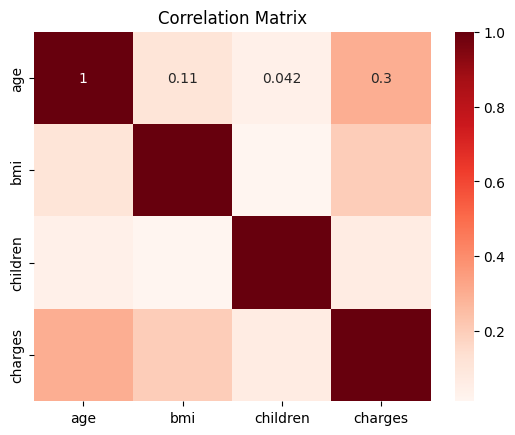

In [26]:
plt.title('Correlation Matrix')
sns.heatmap(medical_df.corr(numeric_only = True), cmap = 'Reds', annot = True)

<b>Correlation vs causation fallacy</b>: 

Note that a high correlation cannot be used to interpret a cause-effect relationship between features. 

Two features X and Y can be correlated if X causes Y or Y causes X, or if both are caused independently by some other factor Z, and the correlation will no longer hold true if one of the cause-effect relationship is broken. 

- For example, there is a correlation between Races and Income, so we may say Race is an f(X) of Income (Y). However, what if both of Income and Races is caused by the third variable: Systemic Racism. 

While this may seem obvious, computers can't differentiate between correlation and causation, and decisions based on automated system can often have major consequences on society, so it's important to study why automated systems lead to a given result. <b>Determining cause-effect relationships requires human insight.</b>

- For example, Amazon has a facial recognition technology that is being used in law enforcement. And because of the distribution of people who are incarcerated. A certain race  has a higher presentation  in the incarcerated population. So the model is more likely to predict a person with a certain race is a criminal or detect them as a criminal.

## Linear Regression using a Single Feature

Estimate the value of 'charges' using the value of 'age' for non-smokers

In [27]:
non_smoker = medical_df[medical_df['smoker'] == 'no']

C:\Users\JENNY LU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\JENNY LU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: title={'center': 'Charges vs Age Among Non-smoker'}, xlabel='age', ylabel='charges'>

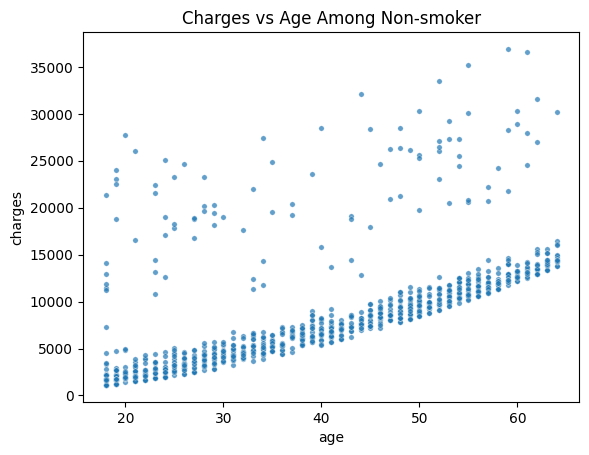

In [28]:
# Visualize the relationship betweeen charges vs age among non-smokers
plt.title("Charges vs Age Among Non-smoker")
sns.scatterplot(non_smoker, x = 'age', y = 'charges', alpha = 0.7, s = 15)

Apart from a few exceptions, the points seem to form a line. We'll try and "fit" a line using this points, and use the line to predict charges for a given age. A line on the X&Y coordinates has the following formula:

y = wx + b

The line is characterized two numbers: 
w (called "slope") and b (called "intercept").

### Model
We're assuming the following relationship between the two: 

charges = w x age + b 

We'll try determine w and b for the line that best fits the data.

This technique is called linear regression, and we call the above equation a linear regression model, because it models the relationship between "age" and "charges" as a straight line.

The numbers w and b are called the parameters or weights of the model.

The values in the "age" column of the dataset are called the inputs to the model and the values in the charges column are called "targets".

In [29]:
# Define the estimate function 
def estimate_charges(age, w, b):
    return w * age + b

#### Assuming / Guessing the values for w and b 

In [30]:
w = 50
b = 100

In [31]:
# Try to put some age value and compare to graph
estimate_charges(40, w, b)
# This estimate is too low compared to the real value

2100

In [32]:
ages = non_smoker['age']
estimated_charges = estimate_charges(ages, w, b)

In [33]:
ages.head()

1    18
2    28
3    33
4    32
5    31
Name: age, dtype: int64

In [34]:
estimated_charges.head()

1    1000
2    1500
3    1750
4    1700
5    1650
Name: age, dtype: int64

In [35]:
# Compare estimated_charges above with non_smoker df
non_smoker['charges'].head()

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

Text(0, 0.5, 'Charges')

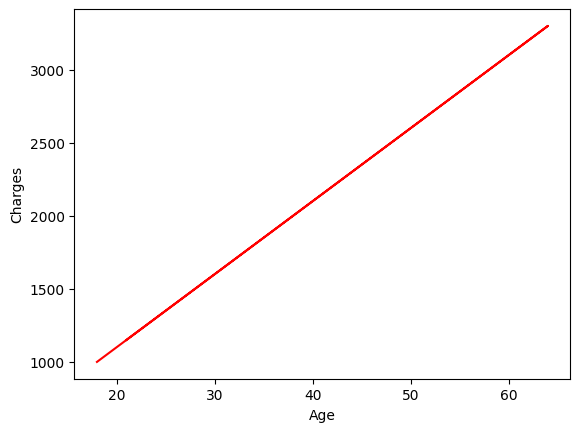

In [36]:
# Plot the estimate charges using a line graph 
plt.plot(ages, estimated_charges, 'r-')
plt.xlabel('Age')
plt.ylabel('Charges')

Let's overlay this line onto the actual data to see how it actually fits


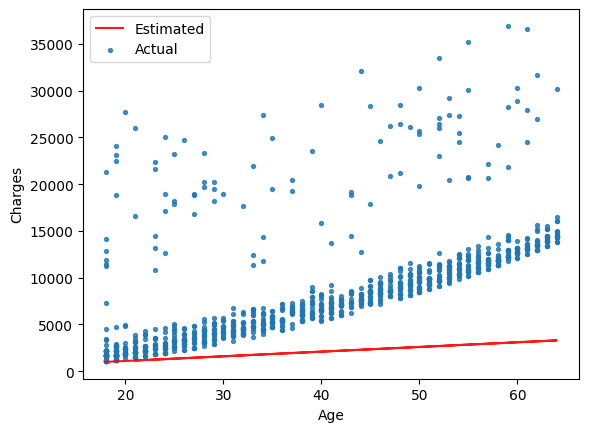

In [37]:
# Define target: the actual data we want to predict 
target = non_smoker['charges']

plt.plot(ages, estimated_charges, 'r', alpha = 0.9)

plt.scatter(ages, target, s = 8, alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimated', 'Actual'])

Our estimates are quite poor and the line does not fit the data. However, we can try different values of w and b to move the line around. 
- Define a helper function try_parameters which take w and b as inputs and creates the above plot

In [109]:
def try_parameters(w,b):
    ages = non_smoker['age']
    target = non_smoker['charges']

    estimated_charges = estimate_charges(ages, w, b) 

    plt.plot(ages, estimated_charges, 'r', alpha = 0.9)
    plt.scatter(ages, target, s = 8, alpha = 0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimated', 'Actual'])

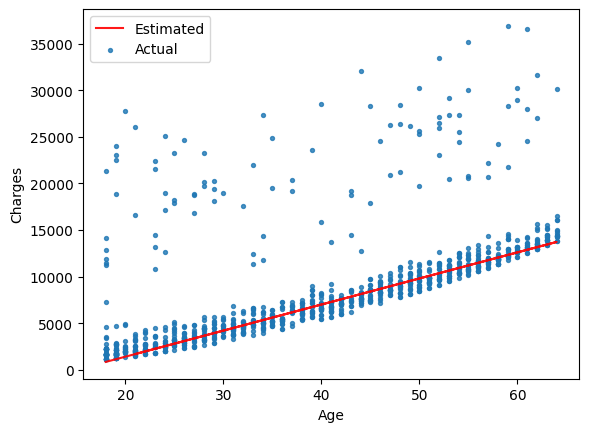

In [39]:
try_parameters(280,-4200)

- As I change b (bias), the line moves up or down

- As I change w (weight), the slope gets steeper or flatter

Wouldn't it be nice if a computer could try several different values of w and b and learn the relationship between "age" and "charges"? To do this, we need to solve a couple of problems:

We need a way to measure numerically how well the line fits the points.

Once the "measure of fit" has been computed, we need a way to modify w and b to improve the the fit.

If we can solve the above problems, it should be possible for a computer to determine w and b for the best fit line, starting from a random guess.

## Loss / Cost Function 

In [40]:
# 2 variables we are going to compare
targets = non_smoker['charges']
predictions = estimated_charges
print(targets.head())
print(predictions.head())
# The problem some predictions may be lower than the target, some higher. 

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64
1    1000
2    1500
3    1750
4    1700
5    1650
Name: age, dtype: int64


<b>We can compare our model's predictions with the actual targets using the following method:</b>

Calculate the difference between the targets and predictions (the differenced is called the "residual")

Square all elements of the difference matrix to remove negative values.

Calculate the average of the elements in the result (All squared residuals) 

Take the square root of the result

The result is a single number, known as the root mean squared error (RMSE). <b>Below is the formula: </b>

![alt text](./Loss_Cost_Function.png)

Geometrically, the residuals can be visualized as follows: 

<img src="https://i.imgur.com/ll3NL80.png" alt="alt text" width="600"/>


In [41]:
import numpy as np 

In [42]:
# Define the RMSE function 
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

Compute the RMSE for our model with a sample set of weights 

In [43]:
w = 50 
b = 100

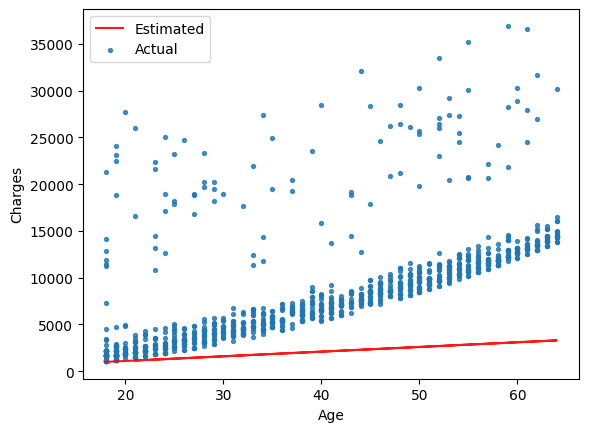

In [44]:
try_parameters(w,b)

In [45]:
targets = non_smoker['charges']
# Calling the predefined weight and bias into the model 
predicted = estimate_charges(non_smoker['age'], w, b)

In [46]:
rmse(targets, predicted)

8461.949562575493

<b> Intepretation: On average, each element in the prediction differs from the actual target by $8461</b>

The result is called the loss because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: <b>the lower the loss, the better the model.</b>

In [110]:
# Modify the try_parameter function to display the loss 
def try_parameters(w,b):
    ages = non_smoker['age']
    target = non_smoker['charges']
    predictions = estimate_charges(ages, w, b)

    estimated_charges = estimate_charges(ages, w, b) 

    plt.plot(ages, estimated_charges, 'r', alpha = 0.9)
    plt.scatter(ages, target, s = 8, alpha = 0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimated', 'Actual'])

    loss = rmse(target, predictions)
    print('RMSE loss:',  loss)

RMSE loss: 4816.941379466545


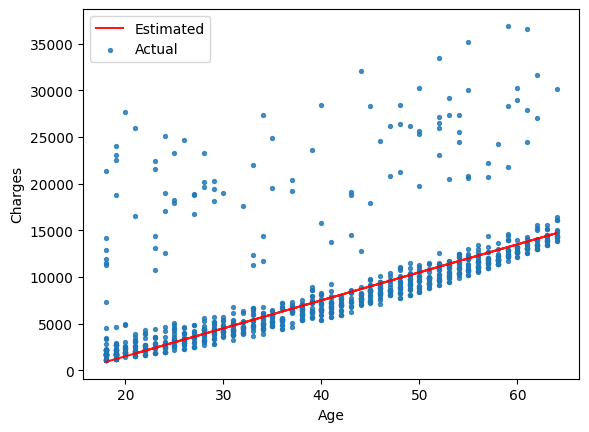

In [48]:
try_parameters(300,-4500)

Next, we need a strategy to modify weights w and b to reduce the loss and improve the "fit" of the line to the data.

- Ordinary Least Squares: https://www.youtube.com/watch?v=szXbuO3bVRk (better for smaller datasets)
- Stochastic gradient descent: https://www.youtube.com/watch?v=sDv4f4s2SB8 (better for larger datasets)

Both of these have the same objective: to minimize the loss, however, while ordinary least squares directly computes the best values for w and b using matrix operations, gradient descent uses a iterative approach, starting with a random values of w and b and slowly improving them using derivatives.

## Linear Regression Using Scikit-learn

In practice, you'll never need to implement either of the above methods yourself. You can use a library like scikit-learn to do this for you.

Find the best fit for 'age' and 'charges' using the Ordinary Least Squares technique.

### Linear Regression Using Ordinary Least Squares

In [112]:
# Ordinary least squares technique
from sklearn.linear_model import LinearRegression

In [50]:
# Create a new model object 
model = LinearRegression()

NOTE: We want the input set to be a DataFrame, not a series

In [113]:
# input set (needs to be 2 dimensional)
inputs = non_smoker[['age']]
# output set (can just be an array)
targets = non_smoker['charges']
print('inputs shape:', inputs.shape)
print('targets shape:', targets.shape)

inputs shape: (1064, 1)
targets shape: (1064,)


Fit the model to the data 

In [114]:
# Tell the computer to calculate the loss, use optimization technique to keep improving the model and return the best results
# When you call this, the w and b has been found, the computer has calculated the lowest RMSE possible 
model.fit(inputs, targets)

LinearRegression()

We can now make predictions using this model. 
- Predict the charges for ages 23, 37, and 61

In [115]:
model.predict(np.array([[23],
                       [37],
                       [61]]))

C:\Users\JENNY LU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

Let's compute the predictions for the entire set of inputs

In [116]:
predictions = model.predict(inputs) #inputs is all the ages

Compare the predictions with the targets

In [117]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [118]:
targets  #The actual value 

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [119]:
rmse(targets, predictions)

4662.505766636395

Our predictions is off by $4662 on average, this is not bad considering the fact that there are several outliers

In [59]:
# Find the w and b inside our model 
# w 
model.coef_

array([267.24891283])

In [60]:
# b 
model.intercept_

-2091.4205565650864

RMSE loss: 4662.505766636395


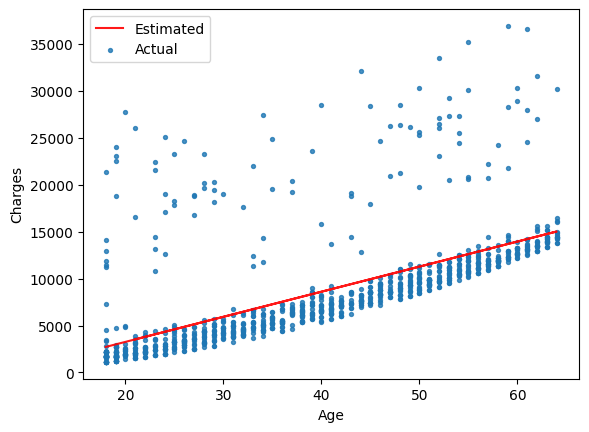

In [120]:
try_parameters(model.coef_, model.intercept_)

### Linear Regression using the Stochastic Gradient Technique

In [63]:
# Stochastic Gradient Descent technique 
from sklearn.linear_model import SGDRegressor

In [121]:
gradient_model = SGDRegressor()
gradient_model.fit(inputs, targets)
gradient_predictions = gradient_model.predict(inputs)
rmse(targets, gradient_predictions)

5217.147672619604

On average, our predictions using the stochastic gradient descent model is $5217 off 

RMSE loss: 5217.147672619604


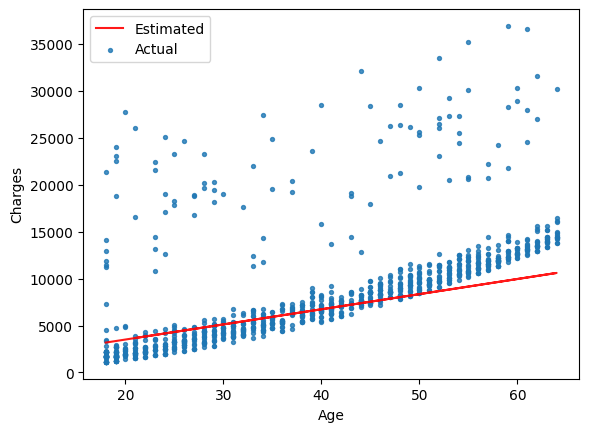

In [122]:
try_parameters(gradient_model.coef_, gradient_model.intercept_)

### Same process but with Smokers

In [74]:
smoker_df = medical_df[medical_df['smoker'] == 'yes']

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

### Ordinary Least Squares

In [128]:
# Modify the try_parameter function to display the loss for smokers
def try_parameters_smokers(w,b):
    ages = smoker_df['age']
    target = smoker_df['charges']
    predictions = estimate_charges(ages, w, b)

    estimated_charges = estimate_charges(ages, w, b) 

    plt.plot(ages, estimated_charges, 'r', alpha = 0.9)
    plt.scatter(ages, target, s = 8, alpha = 0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimated', 'Actual'])

    loss = rmse(target, predictions)
    print('RMSE loss:',  loss)

In [129]:
inputs = smoker_df[['age']]
targets = smoker_df['charges']

In [125]:
# Ordinary Least Squares
ols_model = LinearRegression()
ols_model.fit(inputs, targets)
ols_predictions = ols_model.predict(inputs)

In [126]:
rmse(targets, ols_predictions)

10711.00334810241

RMSE loss: 10711.00334810241


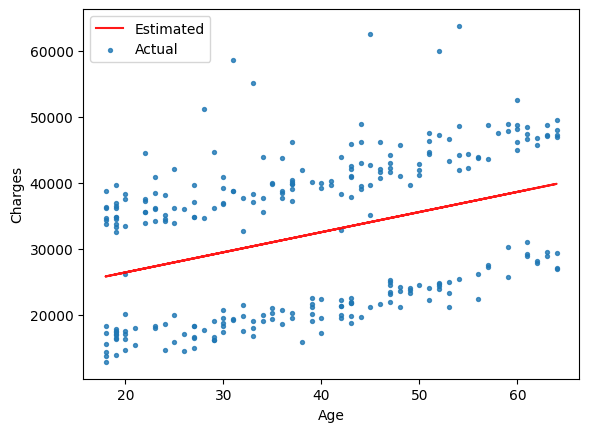

In [130]:
try_parameters_smokers(ols_model.coef_, ols_model.intercept_)

Since there are two significant different clusters for the smoker groups: the regular smokers and the heavy smokers, the RMSE is pretty high

The lowest loss possible is $10711

In [131]:
# Predict how much a person of 40 year old would pay 
ols_model.predict([[40]])

C:\Users\JENNY LU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([32503.63221131])

### Stochatic Gradient Descent

In [132]:
sgd_model = SGDRegressor()
sgd_model.fit(inputs, targets)
sgd_predictions = sgd_model.predict(inputs)

RMSE loss: 19340685513.181744


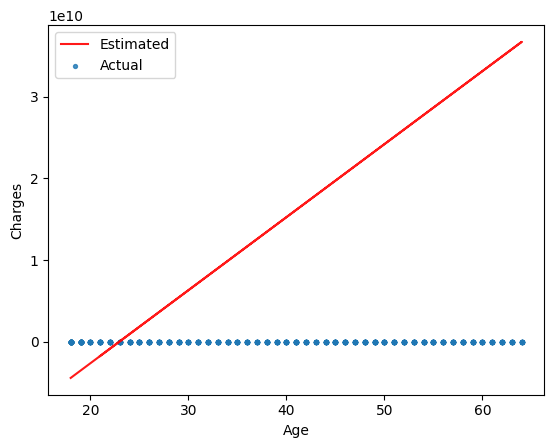

In [133]:
try_parameters(sgd_model.coef_, sgd_model.intercept_)

For some reason, the results does not make sense using this model

<b>Machine learning is simply the process of computing the best parameters to model the relationship between some feature and targets.</b>

Every machine learning problem has three components:

1. Model

2. Cost Function - The lower the cost, the better the model 

3. Optimizer

![alt text](https://i.imgur.com/oiGQFJ9.png)

### Linear Regression Using Multiple Features

Use 'age' and 'bmi' to estimate 'charges' 
- charges = w1 * age + w2 * bmi + b

In [148]:
inputs = non_smoker[['age', 'bmi']]
targets = non_smoker['charges']

In [145]:
# Create and train the model 
model = LinearRegression().fit(inputs, targets)
# Generate predictions
predictions = model.predict(inputs)
# Compute loss to evaluate the mode 
loss = rmse(targets,predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


In [150]:
model.coef_, model.intercept_
# The weight applied to the bmi is very small
# There is minor changes in w1 and the intercept

(array([266.87657817,   7.07547666]), -2293.6320906488727)

This decrease the loss from the last single 'age' feature model from $4816 to $4662.
- The model gets better with the more information you feed it

It's a significant drop since there isn't a strong correlation between 'bmi' and 'charges'

In [136]:
non_smoker['bmi'].corr(non_smoker['charges'])

0.0840365431283327

C:\Users\JENNY LU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\JENNY LU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\JENNY LU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: xlabel='bmi', ylabel='charges'>

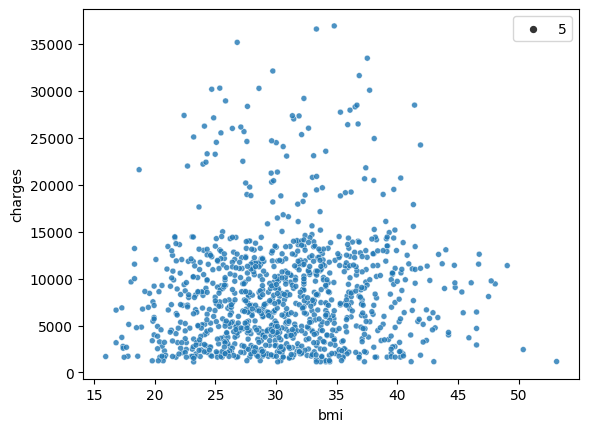

In [152]:
sns.scatterplot(non_smoker, x = 'bmi', y = 'charges', size = 5, alpha = 0.8)

### An important thing to keep in mind: 
You can not create a machine learning model between variables that don't have a relationship with each other

In [160]:
# Try all 3 numerical values
inputs = non_smoker[['age', 'bmi', 'children']]
targets = non_smoker['charges']

In [161]:
# Create and train the model 
model = LinearRegression().fit(inputs, targets)
# Generate predictions
predictions = model.predict(inputs)
# Compute loss to evaluate the mode 
loss = rmse(targets,predictions)
print('Loss:', loss)

Loss: 4608.470405038246


In [164]:
fig = px.strip(non_smoker, x = 'children', y = 'charges')
fig.update_layout(width = 700)
fig.show()

As we can see, there is a weak relationship between children and charges

The loss decreased a little bit

### Now, train a model for ALL customers and see the loss

In [165]:
inputs = medical_df[['age', 'bmi', 'children']]
targets = medical_df['charges']

In [166]:
# Create and train the model 
model = LinearRegression().fit(inputs, targets)
# Generate predictions
predictions = model.predict(inputs)
# Compute loss to evaluate the mode 
loss = rmse(targets,predictions)
print('Loss:', loss)

Loss: 11355.317901125973
